# Exploratory Data Analysis
In this notebook we will inspect the cleaned data with the following goals in mind:
 * Identify multicolinearity issues.
 * Identify data transformations that will be required before fitting.
 * Visualize any relevant structure within the data.

## Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Importing cleaned data

In [2]:
df = pd.read_csv('data/cleaned.csv')

## Inspecting the data
We note that most variables display heteroskedasticity with respect to price with more luxurious values of input variables exhibiting more dispersed price. We hypothesize that price grows exponentially with respect to perceived luxury. This is supported by [REF]. Therefore, we expect that the log of price to be linearly related to our inputs.

Variables indicating square footage seem to have longer right tails and display a lack of normality. Since homes tend to have essentially square floor plans, it seems reasonable to that the square root of square footage metrics might provide a better measure of the size of a house.

Lot size seems to behave more like a measure of luxury and as such falls off exponentially in frequency as it grows, therefore we apply a log transformation to lot size variables.

Finally, our date variable, describing the date of sale, is precise to the day. However, we do not expect price to vary substantially on this time scale. For this reason, we chose to group sales by month.

### Inspecting the distributions of variables

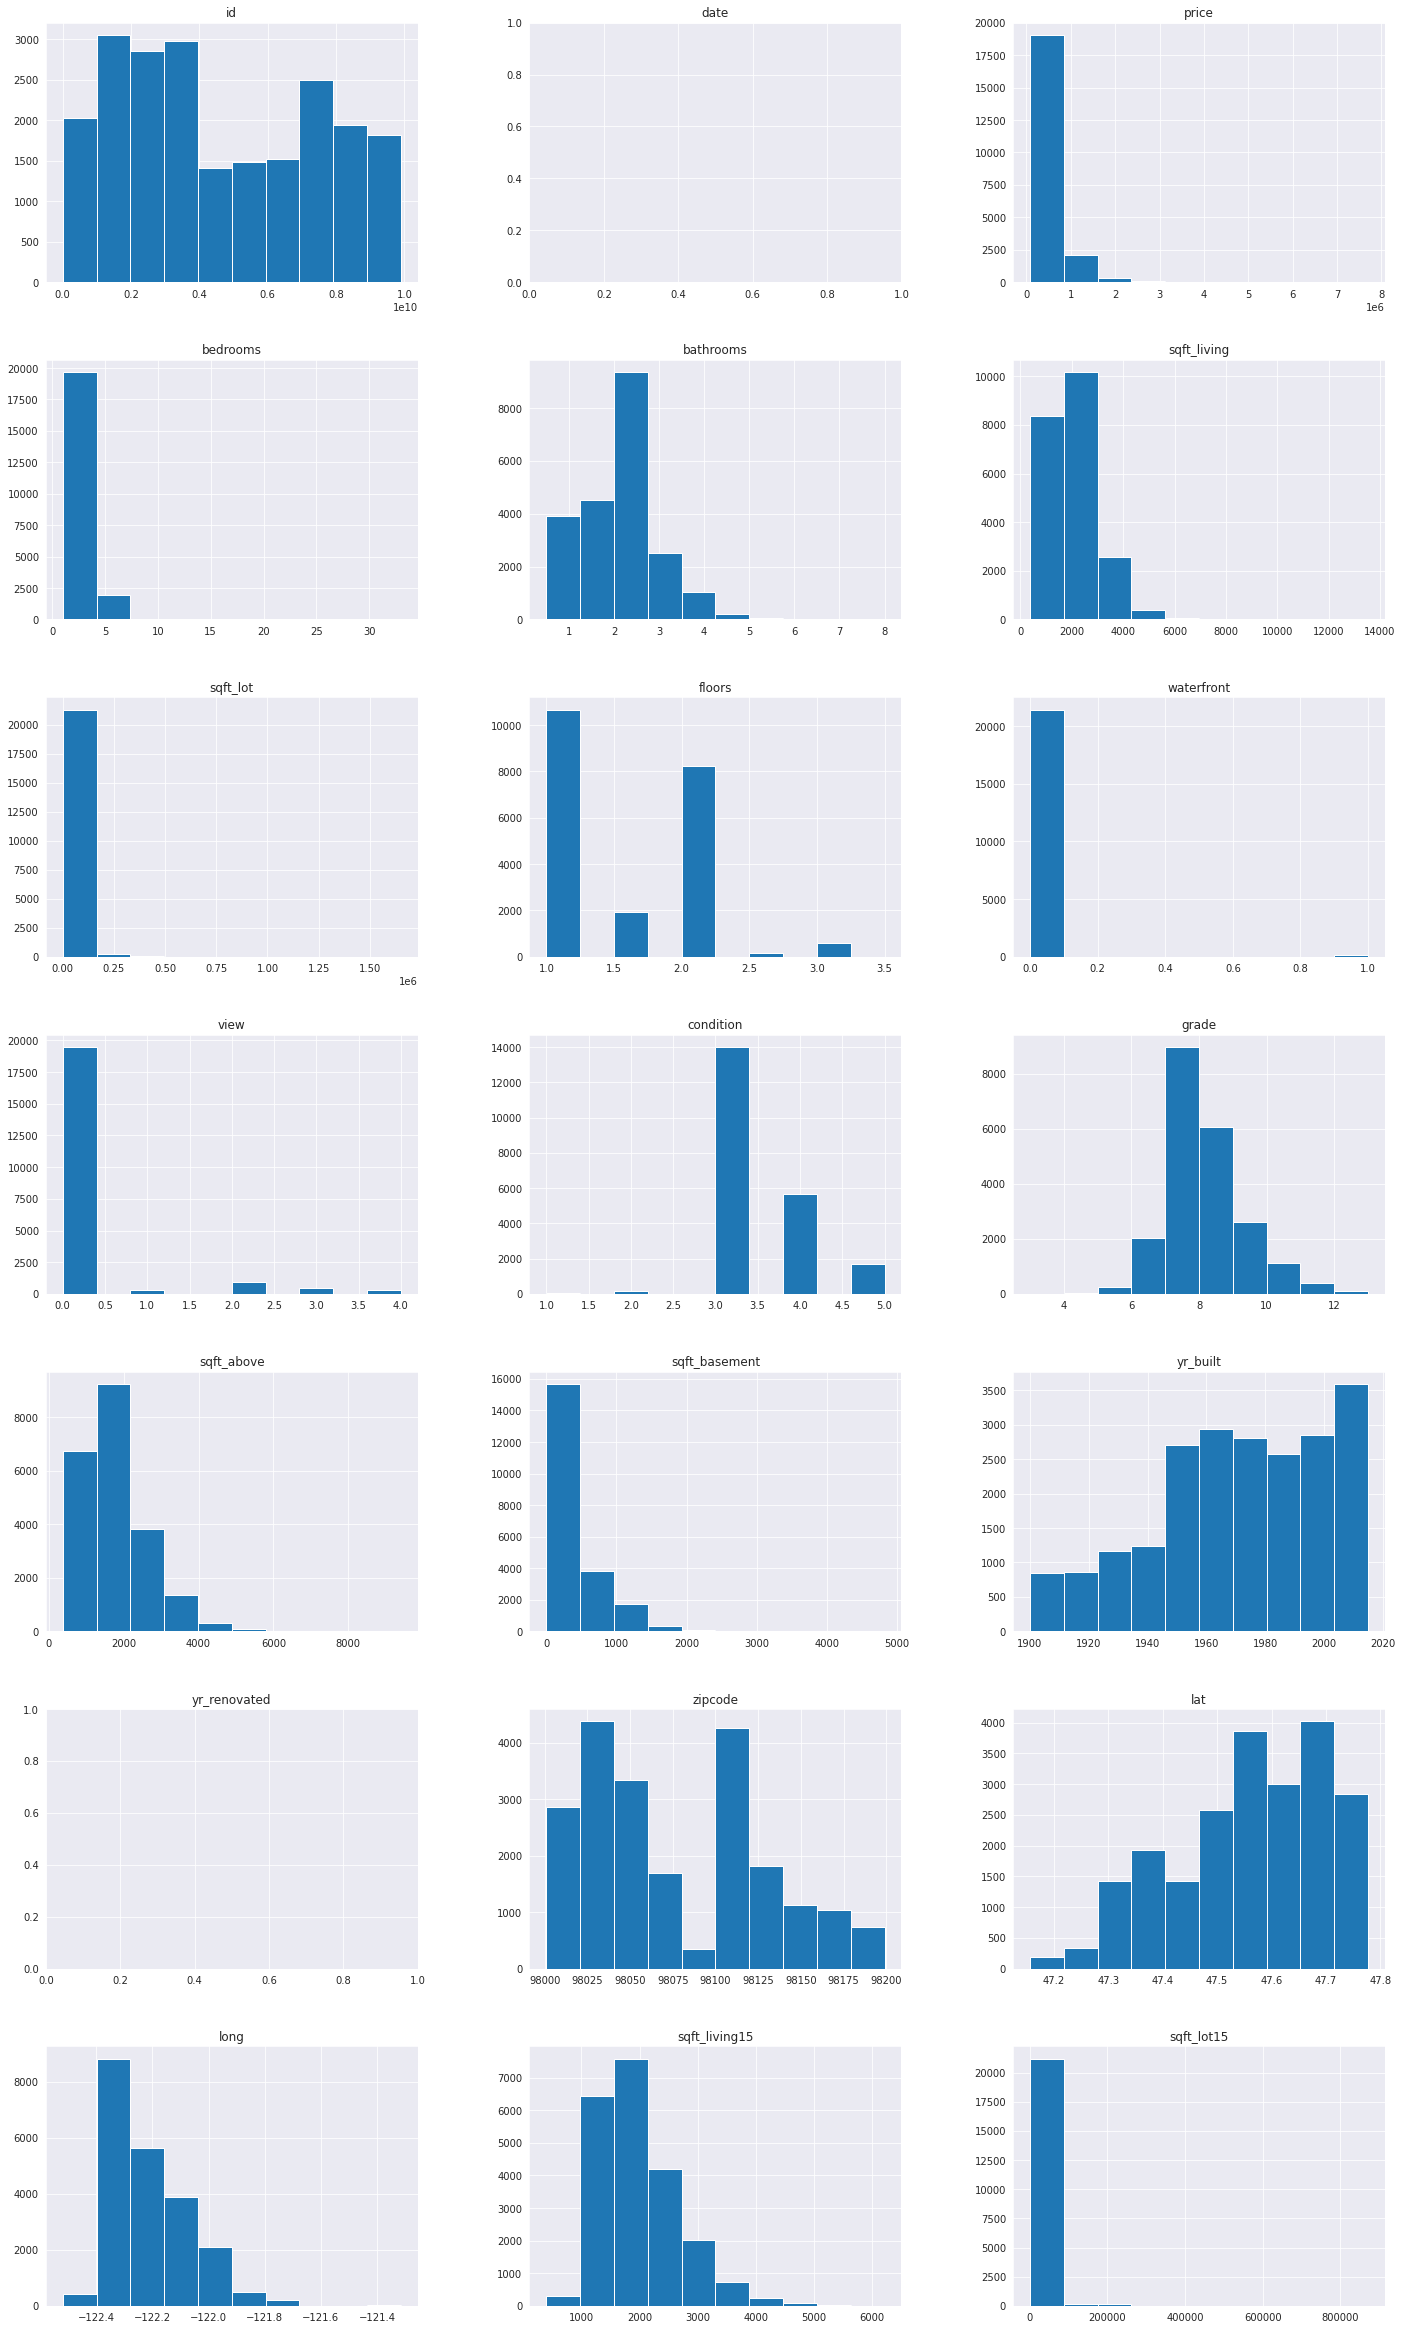

In [3]:
fig, axs = plt.subplots(7,3)
fig.set_figwidth(24)
fig.set_figheight(42)
for ax, col in zip(axs.flat, df.columns):
    try:
        df.hist(col, ax=ax)
    except:
        ax.set_title(col)
        continue

### Inspecting relationships between input variables and price

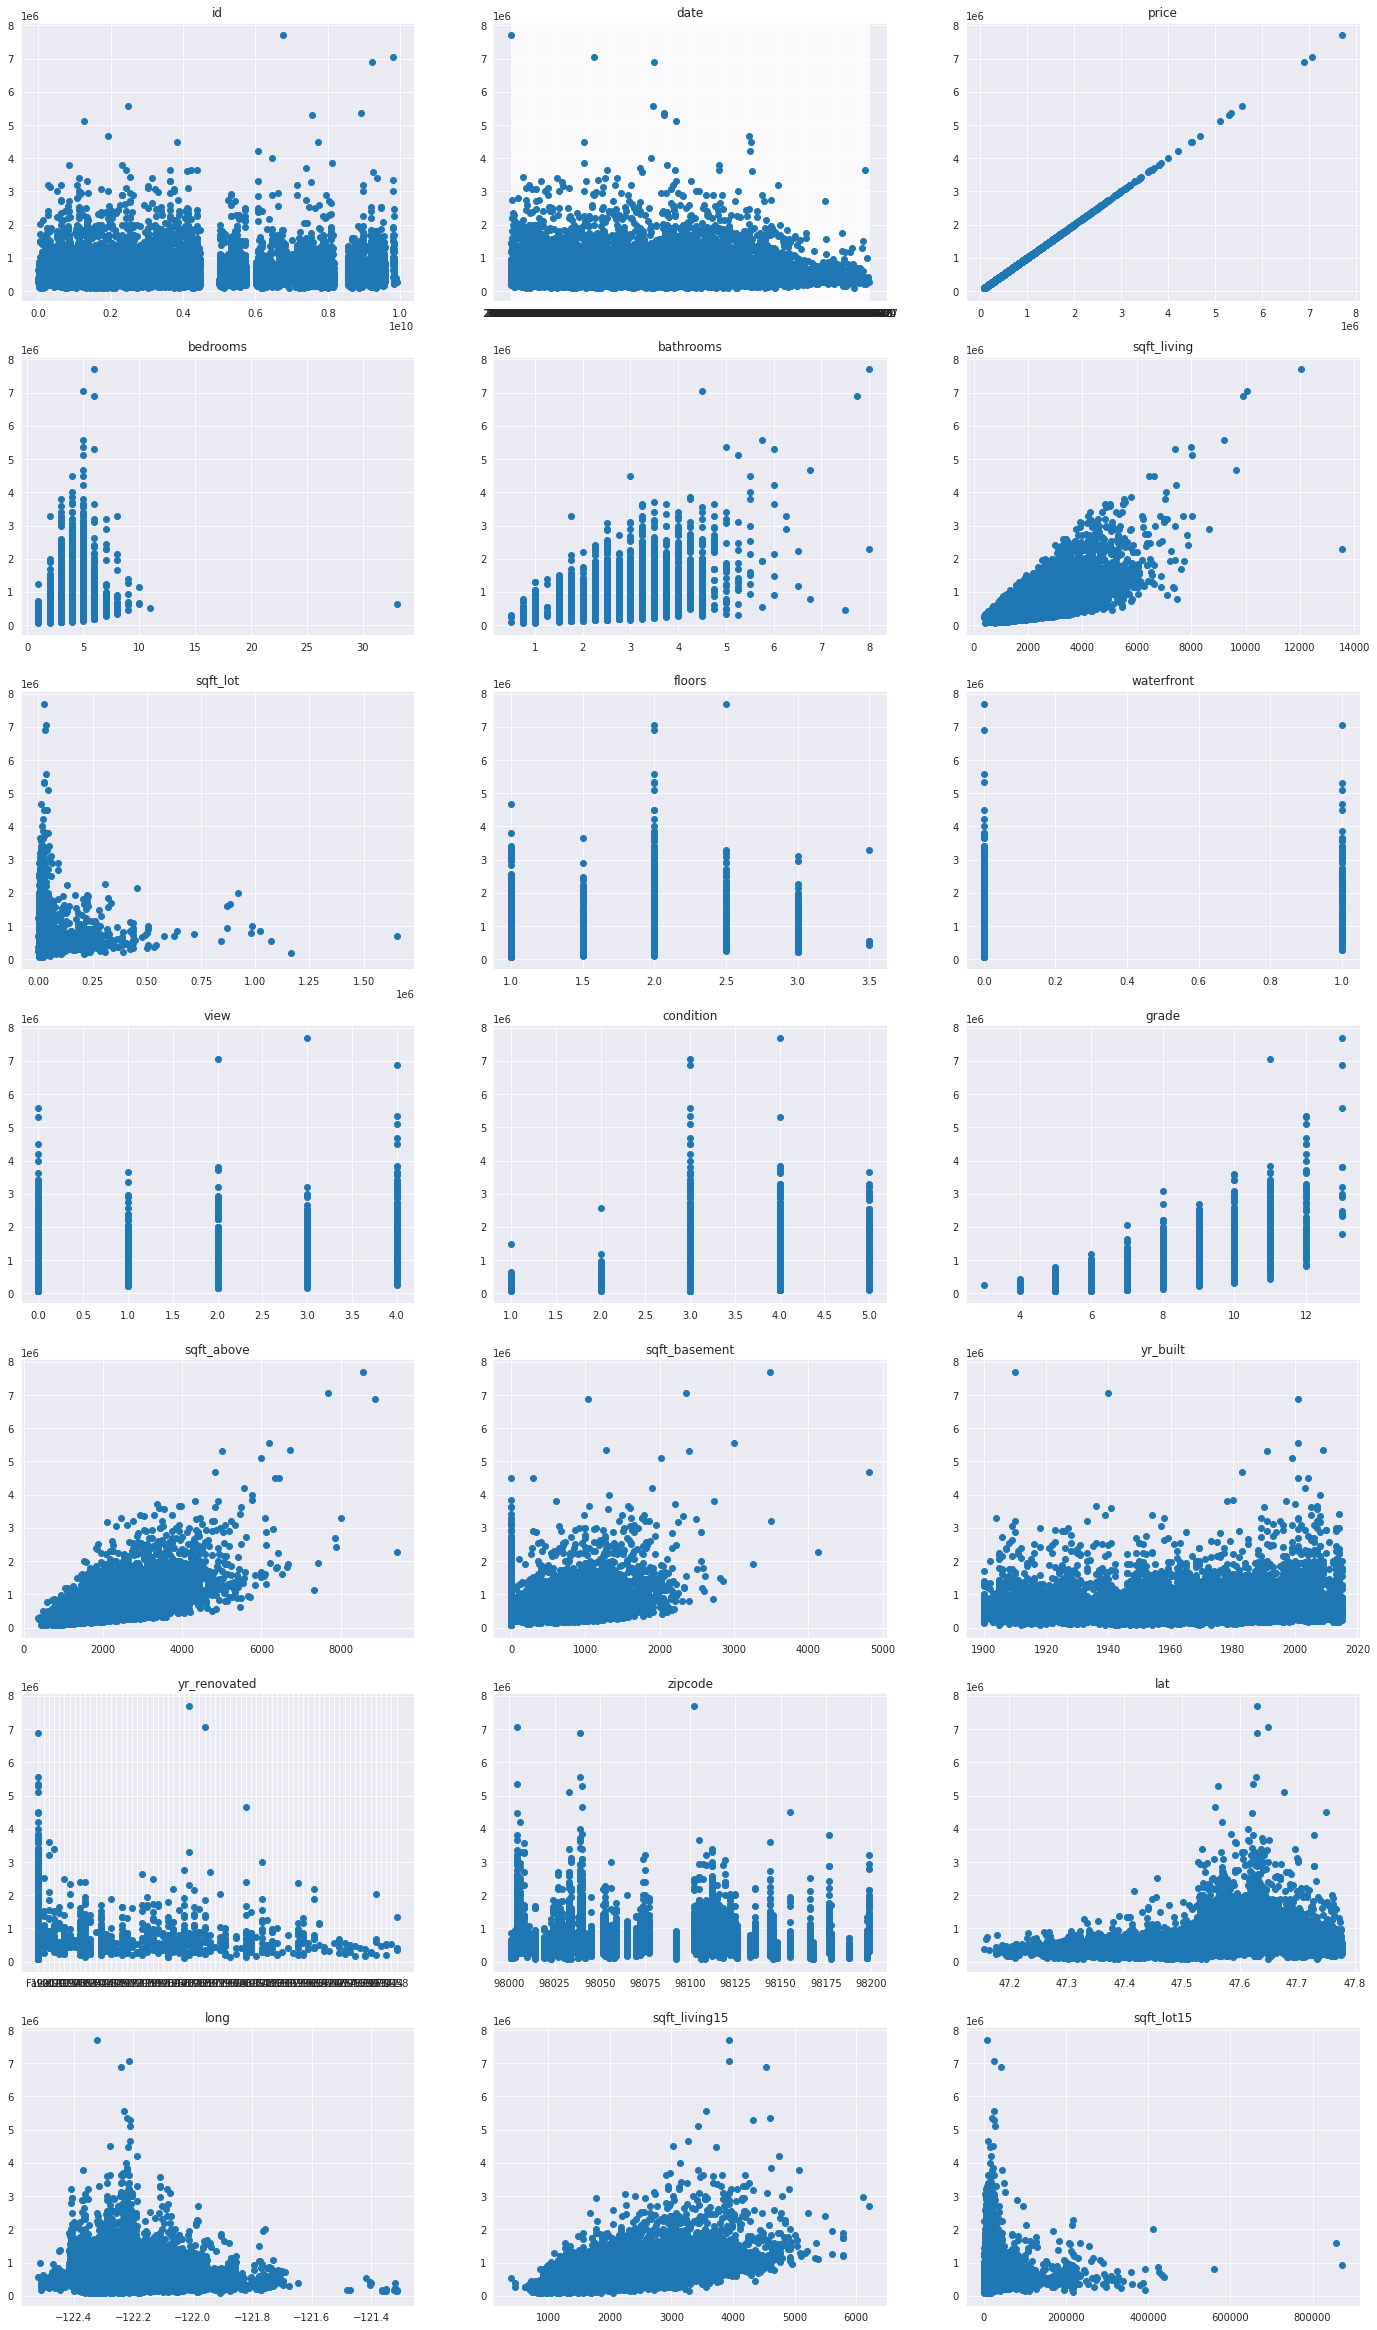

In [4]:
fig, axs = plt.subplots(7,3)
fig.set_figwidth(24)
fig.set_figheight(42)
for ax, col in zip(axs.flat, df.columns):
    try:
        ax.scatter(x=col, y='price', data=df)
        ax.set_title(col)
    except:
        ax.set_title(col)
        continue

## Testing data transformations
Below we note that the log-price is more normally distributed and that most variables now display homoskedasticity. We will model the log of price as our target.

Measures of footage are more normally distributed and show high quality linear relationships with log-price.

Sales are more or less uniformly distributed across months and date of sale does not appear to be strongly related to price.

We note that bedrooms, bathrooms, and grade all appear to have strong linear relationships with log-price.

### Preliminary data transformations

In [5]:
import numpy as np
Transformed = df.copy()
for col in Transformed.columns:
    if 'lot' in col:
        Transformed[col] = df[col].apply(lambda x: np.log10(x))
    elif col.startswith('sqft_'):
        Transformed[col] = df[col].apply(lambda x: np.sqrt(x))

Transformed['price'] = df['price'].apply(lambda x: np.log10(x))
Transformed['date'] = pd.to_datetime(df['date']).dt.month

### Inspecting distributions of transformed variables

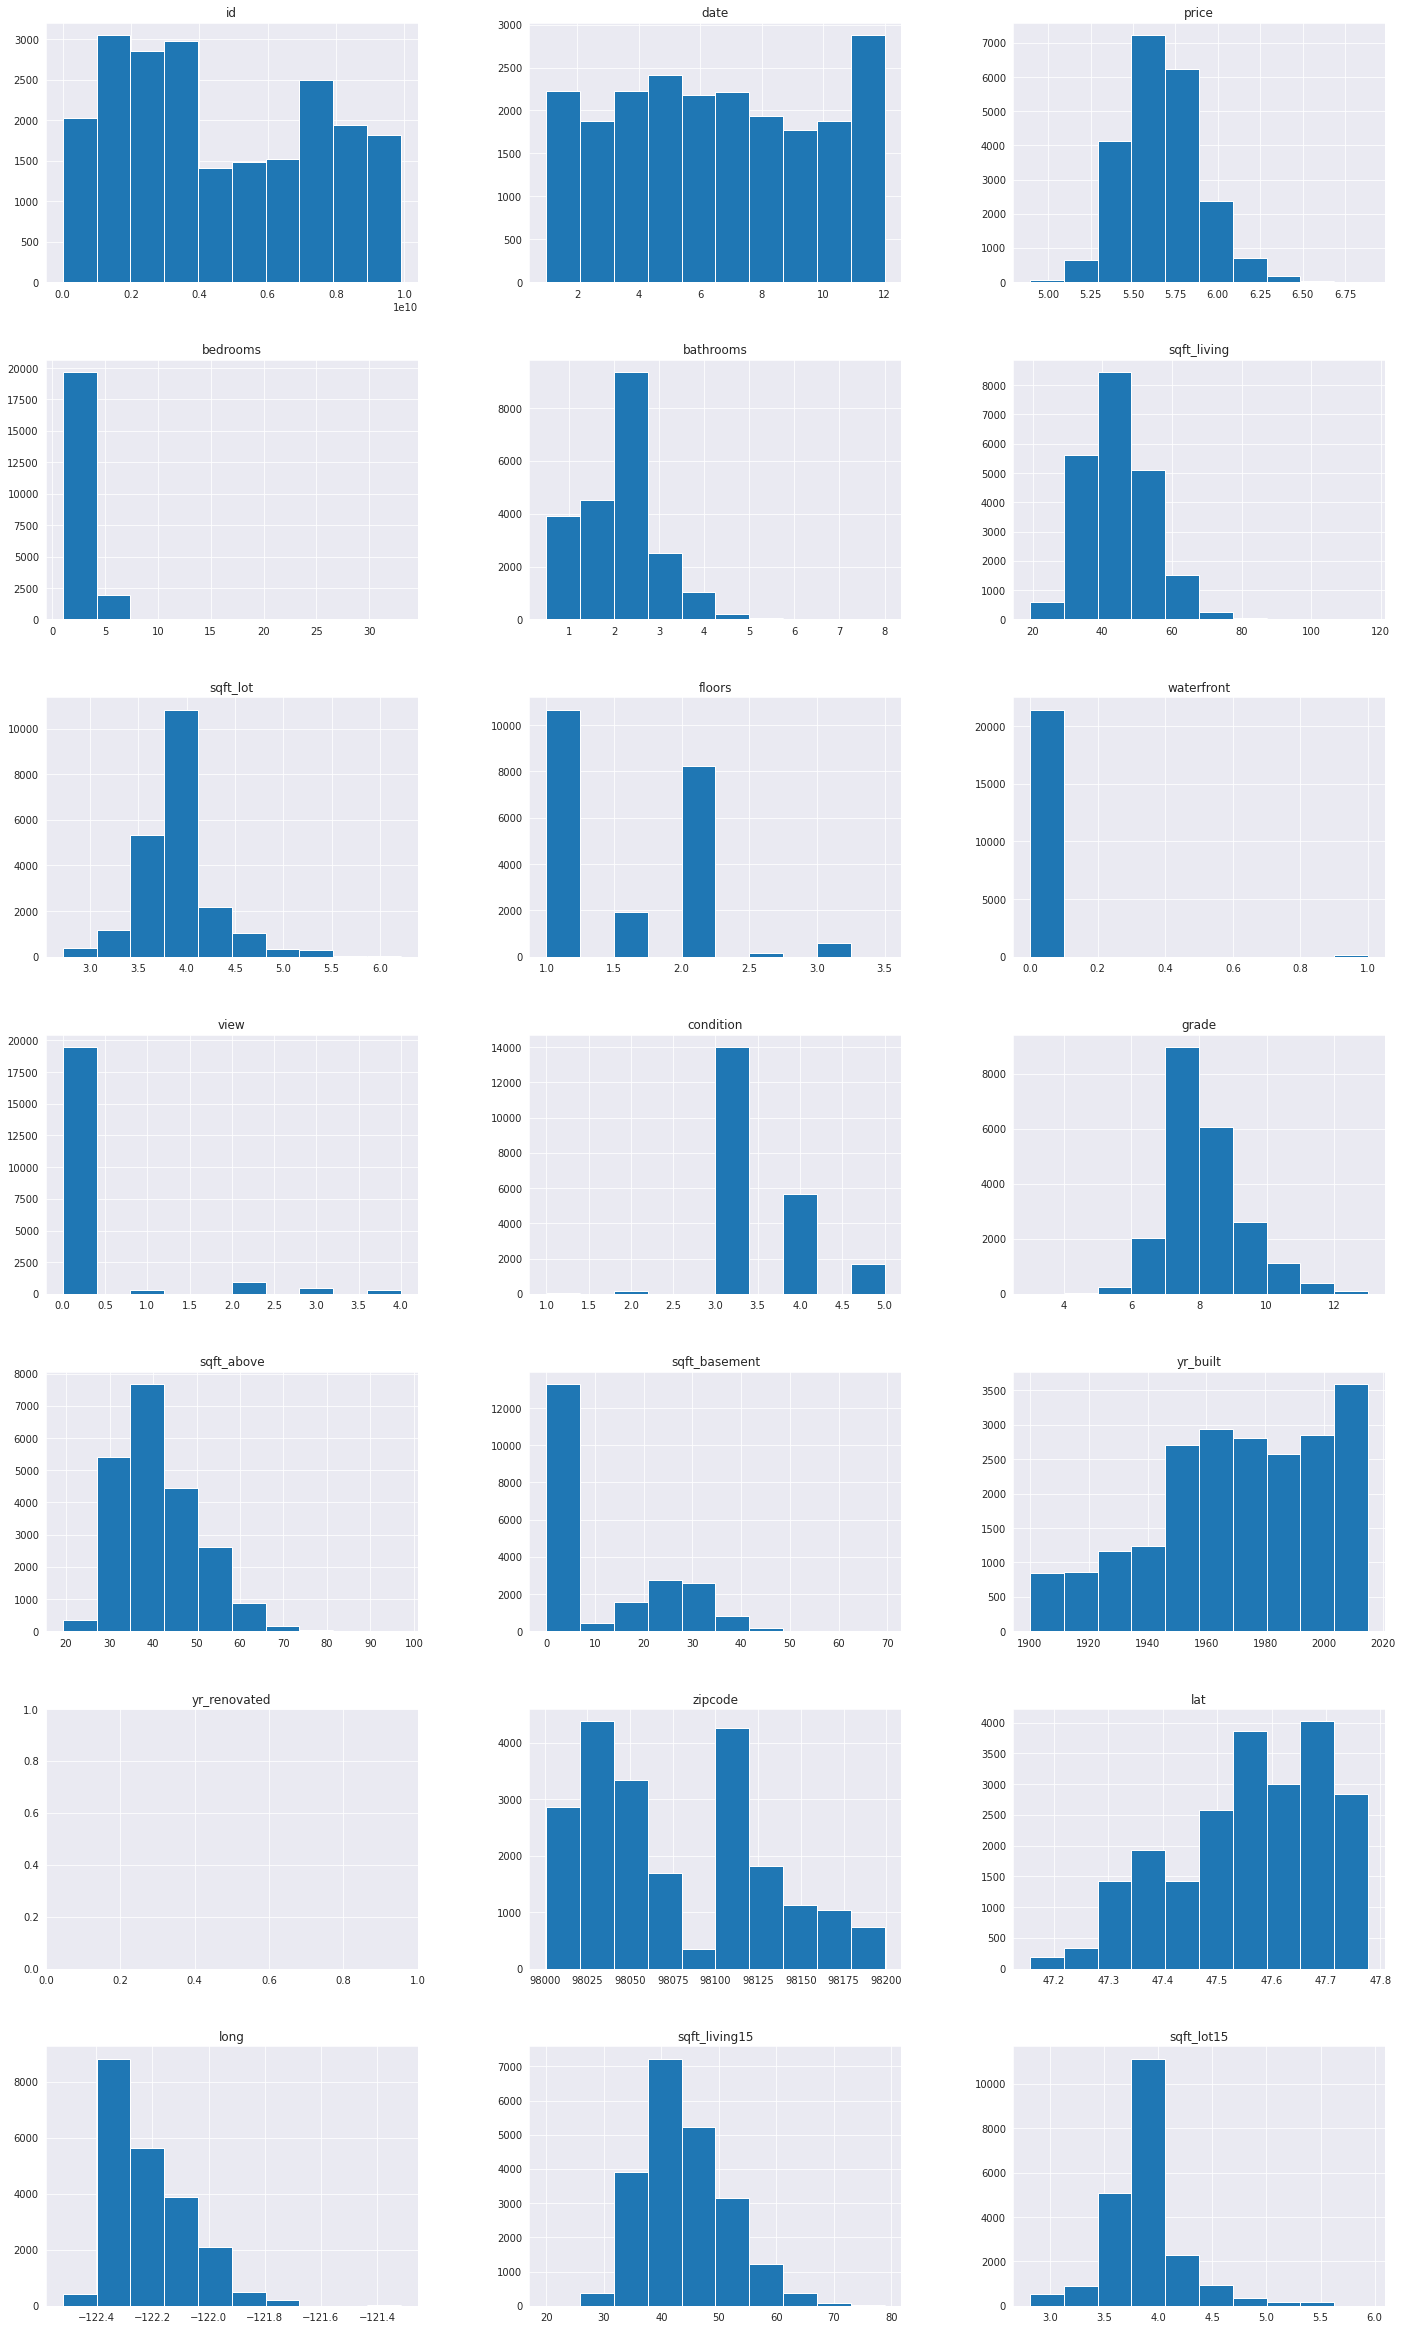

In [6]:
fig, axs = plt.subplots(7,3)
fig.set_figwidth(24)
fig.set_figheight(42)
for ax, col in zip(axs.flat, Transformed.columns):
    try:
        Transformed.hist(col, ax=ax)
    except:
        ax.set_title(col)
        continue

### Inspecting relationships between input variables and log-price

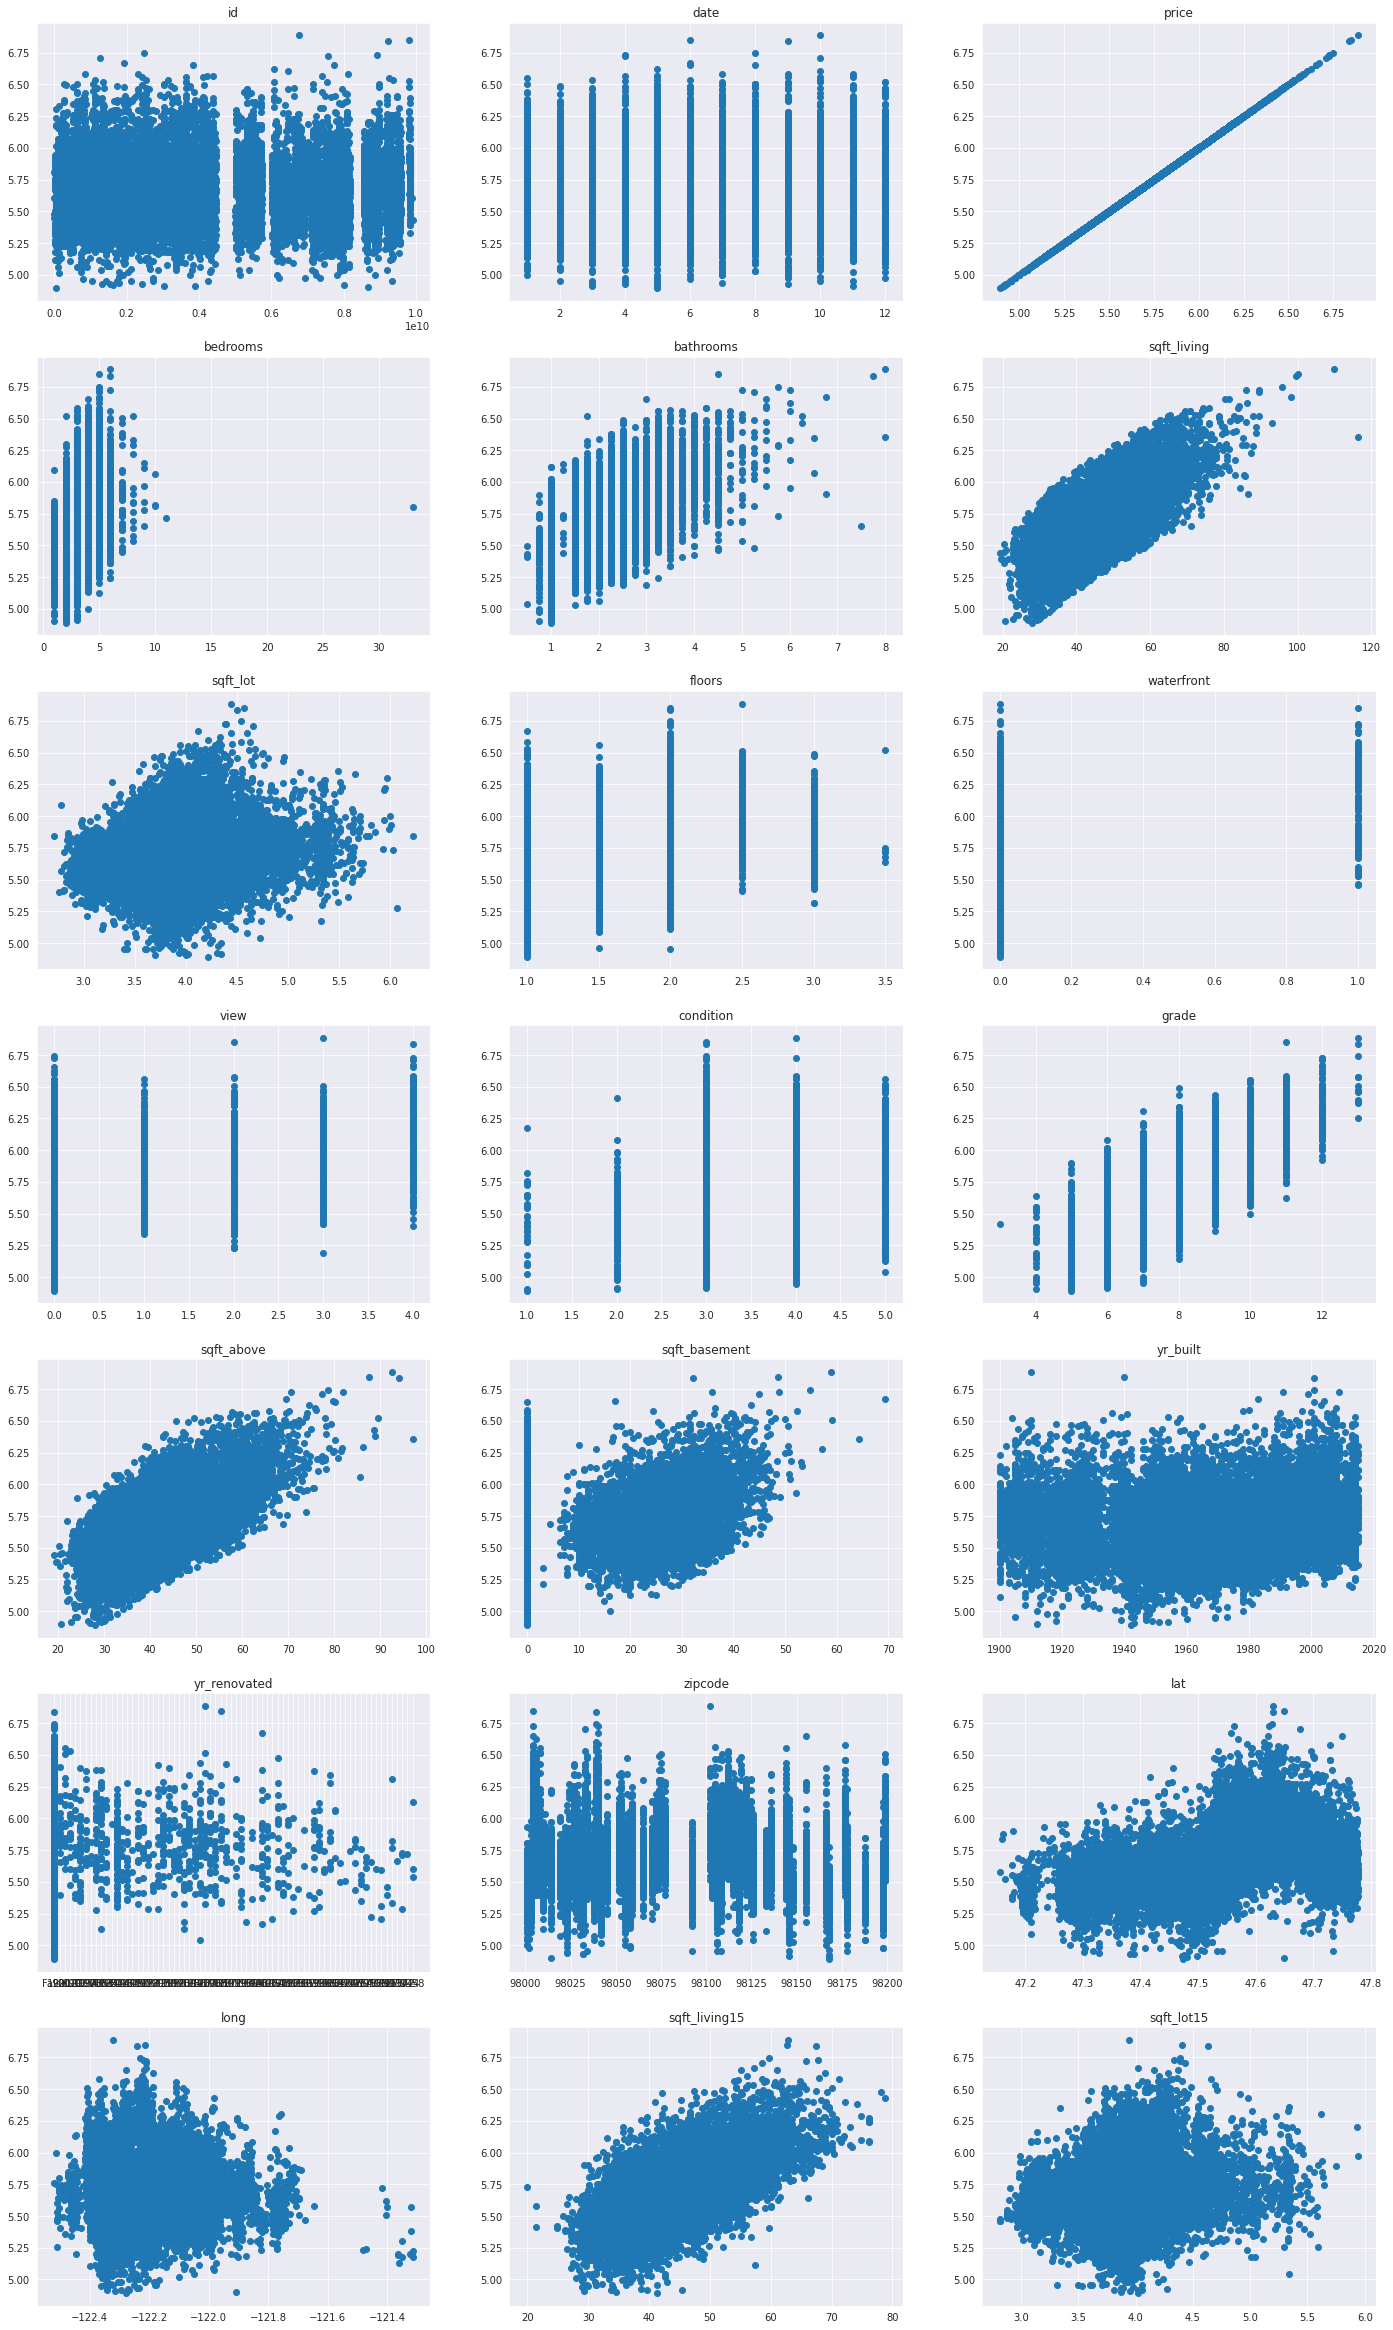

In [7]:
fig, axs = plt.subplots(7,3)
fig.set_figwidth(24)
fig.set_figheight(42)
for ax, col in zip(axs.flat, Transformed.columns):
    try:
        ax.scatter(x=col, y='price', data=Transformed)
        ax.set_title(col)
    except:
        continue

## Checking for pairwise linear relationships between the transformed footage variables.
It is clear that `sqft_living`, `sqft_above`, and `sqft_basement` are linearly related. Similarly, we would expect strong relationships between `sqft_living15` with the aforementioned variables since this variable is a average of square footage of 15 neighboring homes. 

Based on the visualizations below, it looks like it would be best to select one measure of indoor living space and one measure of outdoor living space for a regression model. We will model with `ft_living` and `log_sqft_lot`

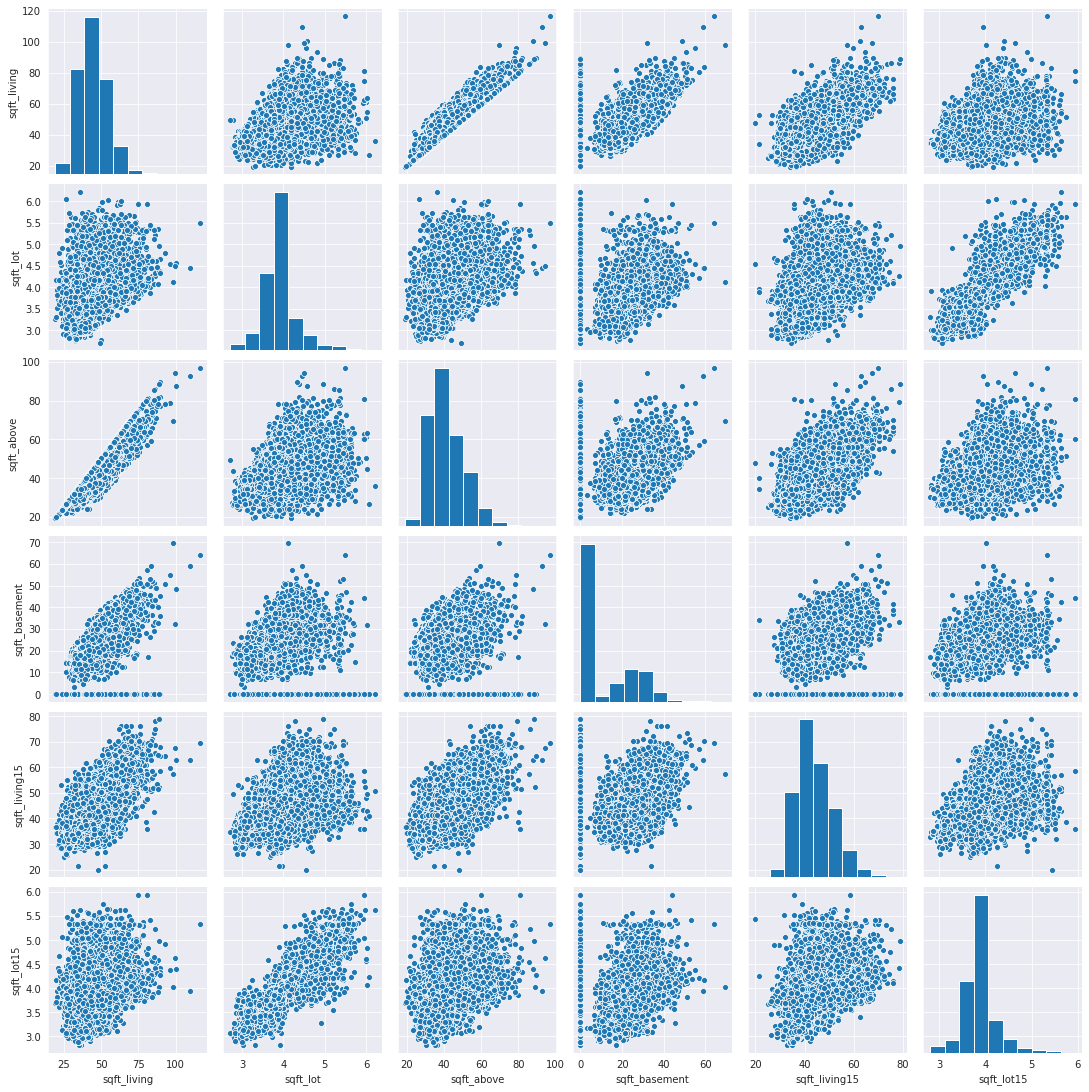

In [8]:
ft_cols = [col for col in Transformed.columns if col.startswith('sqft_')]
ft_vars = Transformed[ft_cols]
sns.pairplot(ft_vars)

<AxesSubplot:>

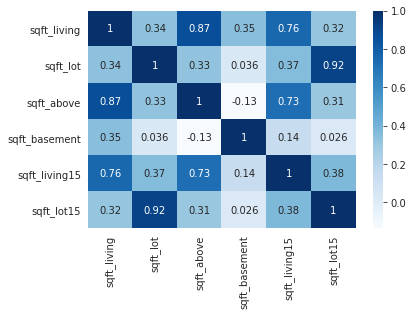

In [9]:
ft_corr = ft_vars.corr()
sns.heatmap(ft_corr, annot=True, cmap='Blues')

## Conclusion
Based on the forgoing analysis. We will try to model log-price using the following variables:
 * bed rooms
 * bath rooms 
 * ft_living
 * log_sqft_lot
 * grade
 * waterfront?
 * condition?

We would like to visualize house location and price on a map.

We should inspect date of sale more closely to identify optimal timing for buying and selling.

We need to find a way to incorporate location into the model. Possibly, by clustering on latitude longitude and price to create a location based categorical variable.